In [1]:
import logi 

### date

In [8]:
# Time string in "YYYY-MM-DD" format 
date_str = "2025-09-25"
print(f"Date: {date_str}")

Date: 2025-09-25


### site

In [9]:
MPC_OBSERVATORY_CODE = 'Y28'
# Observatory data 
MPC_CODES_FILE = 'C:/Users/michi/OneDrive/Escritorio/phase_curves_project/MPC_observatory_codes/MPC_OBS_CODES.csv'
site_longitude_360, site_latitude, site_elevation_m = logi.get_observatory_coordinates(MPC_CODES_FILE, MPC_OBSERVATORY_CODE)
# Convert 0-360 E to -180 to +180 E
site_longitude = site_longitude_360
if site_longitude > 180.0:
    site_longitude = site_longitude - 360.0 

print(f"Observatory {MPC_OBSERVATORY_CODE}: {site_latitude:.4f}°N, {site_longitude:.4f}°E, {site_elevation_m}m")

### utc offset from coordinates
utc_offset, tz_name = logi.get_utc_offset_from_coords(site_latitude, site_longitude)
print(f"UTC Offset: {utc_offset:+.1f} hours")



Observatory Y28: -8.7887°N, -38.6874°E, 414.679m
UTC Offset: -3.0 hours


### calculate evening and morning events 

In [10]:
date_str,date_str_2,sunset_1,dusk_1,dawn_2,sunrise_2 = logi.calculate_sun_evening_and_morning_events(date_str,site_longitude, site_latitude, utc_offset, site_elevation_m)
# --- Final Observation Plan Summary ---
print(f"Observation Night: {date_str} to {date_str_2}")
print(f"Sunset: {logi.decimal_hours_to_time(sunset_1)}")
print(f"Astronomical Dusk: {logi.decimal_hours_to_time(dusk_1)}")
print(f"Astronomical Dawn (Next Day): {logi.decimal_hours_to_time(dawn_2)}")
print(f"Sunrise (Next Day): {logi.decimal_hours_to_time(sunrise_2)}")

Observation Night: 2025-09-25 to 2025-09-26
Sunset: 17:34:07.86
Astronomical Dusk: 18:40:49.25
Astronomical Dawn (Next Day): 04:13:16.18
Sunrise (Next Day): 05:19:58.88


### object coordinates

In [11]:
ra_dec_str = "14 09 46.7 +01 59 47"

list_dates_str,list_dates_objects,list_altitude_degrees = logi.calculate_object_altitude_range(ra_dec_str,date_str,sunset_1,site_longitude,site_latitude)

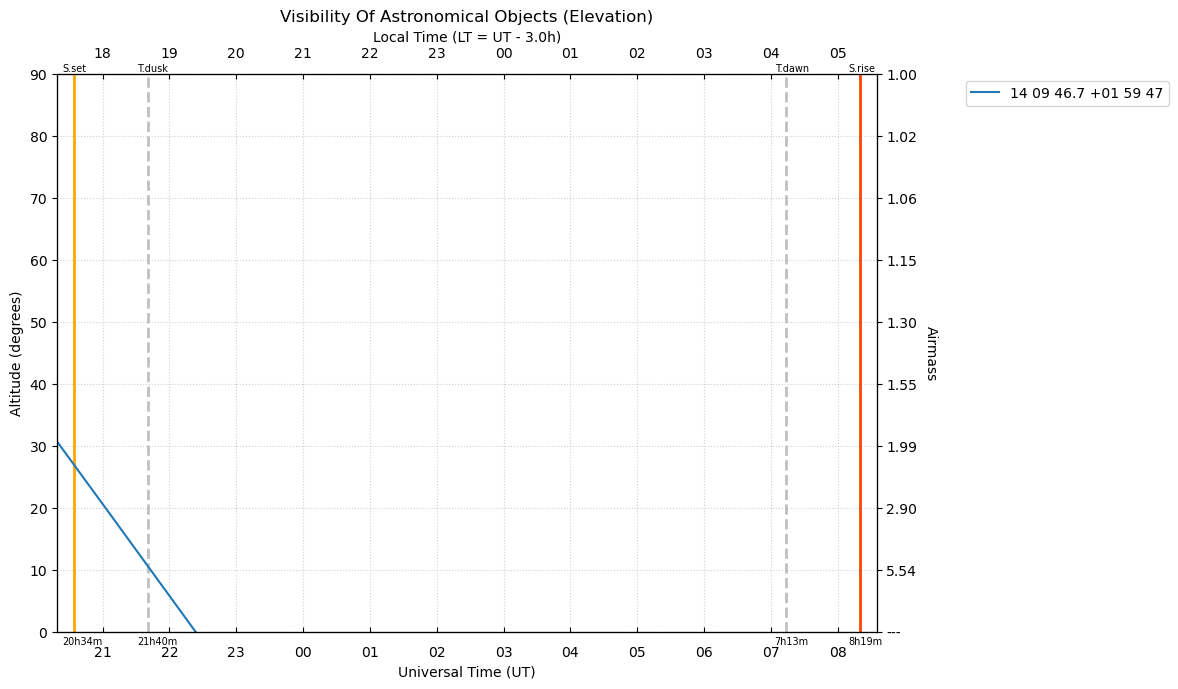

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter # Import FuncFormatter

# --- 1. Define the Time Data and UT Offset ---
# The UTC Offset (e.g., Local Time = UTC - 3 hours)
# NOTE: Using a hypothetical UT_OFFSET = -3 for this example.
# Ensure 'date_str', 'maped.decimal_hours_to_time', 'sunset_1', etc., are defined in your environment.
# UT_OFFSET = -3 # hours. Change this to your actual offset.

# Placeholder date for the 'current' day (Oct 2, 2025)
# Using a dummy date_str and time values for the purpose of a runnable example
# date_str = "2025-10-02"
today = datetime.strptime(date_str, "%Y-%m-%d")
tomorrow = today + timedelta(days=1)


# 1a. Calculate Local Time (LT) data points
LT_SUNSET = logi.parse_time(logi.decimal_hours_to_time(sunset_1), today)
LT_twilight_dusk = logi.parse_time(logi.decimal_hours_to_time(dusk_1), today)
LT_twilight_dawn = logi.parse_time(logi.decimal_hours_to_time(dawn_2), tomorrow)
LT_SUNRISE = logi.parse_time(logi.decimal_hours_to_time(sunrise_2), tomorrow)

# 1b. ***CRUCIAL STEP: Convert LT events to UT events***
# UT = LT - UT_OFFSET
UT_SUNSET = LT_SUNSET - timedelta(hours=utc_offset)
UT_twilight_dusk = LT_twilight_dusk - timedelta(hours=utc_offset)
UT_twilight_dawn = LT_twilight_dawn - timedelta(hours=utc_offset)
UT_SUNRISE = LT_SUNRISE - timedelta(hours=utc_offset)

# The data to be plotted (UT)
all_events_ut = [UT_SUNSET, UT_twilight_dusk, UT_twilight_dawn, UT_SUNRISE]

# --- 2. Create the Primary Plot (Now representing UT) ---
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the vertical lines using the UT events
ax.axvline(UT_SUNSET, color='orange', linestyle='-', linewidth=2)#, label='Sunset')
ax.axvline(UT_twilight_dusk, color='silver', linestyle='--', linewidth=2)#, label='Twilight Dusk')
ax.axvline(UT_twilight_dawn, color='silver', linestyle='--', linewidth=2)#, label='Twilight Dawn')
ax.axvline(UT_SUNRISE, color='orangered', linestyle='-', linewidth=2)#, label='Sunrise')


# Set y-axis and limits
ax.set_yticks([0,10,20,30,40,50,60,70,80,90])
ax.set_ylim(0, 90)


# Text sunset sunrise 
text_sunset = str(UT_SUNSET.hour)+'h'+str(UT_SUNSET.minute)+'m'
ax.text(UT_SUNSET-timedelta(minutes=10),-2,str(text_sunset), fontsize=7)
ax.text(UT_SUNSET-timedelta(minutes=10),90.5,str("S.set"), fontsize=7)


text_dusk = str(UT_twilight_dusk.hour)+'h'+str(UT_twilight_dusk.minute)+'m'
ax.text(UT_twilight_dusk-timedelta(minutes=10),-2,str(text_dusk), fontsize=7)
ax.text(UT_twilight_dusk-timedelta(minutes=10),90.5,str('T.dusk'), fontsize=7)


text_dawn = str(UT_twilight_dawn.hour)+'h'+str(UT_twilight_dawn.minute)+'m'
ax.text(UT_twilight_dawn-timedelta(minutes=10),-2,str(text_dawn), fontsize=7)
ax.text(UT_twilight_dawn-timedelta(minutes=10),90.5,'T.dawn', fontsize=7)


text_sunrise = str(UT_SUNRISE.hour)+'h'+str(UT_SUNRISE.minute)+'m'
ax.text(UT_SUNRISE-timedelta(minutes=10),-2,str(text_sunrise), fontsize=7)
ax.text(UT_SUNRISE-timedelta(minutes=10),90.5,'S.rise', fontsize=7)


# Set the x-axis limits based on the UT events
start_time_ut = min(all_events_ut) - timedelta(minutes=15)
end_time_ut = max(all_events_ut) + timedelta(minutes=15)
ax.set_xlim(start_time_ut, end_time_ut)

# --- Primary X-Axis (Bottom): Universal Time (UT) ---
# Since the data being plotted (UT_SUNSET, etc.) is already in UT, 
# we can use the standard DateFormatter.
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
# Adjust the location of the twin axis ticks
ax.tick_params(axis='x', direction='in', pad=10)


# Set the main axis label to UT
ax.set_xlabel("Universal Time (UT)")
ax.set_ylabel("Altitude (degrees)")
ax.grid(axis='x', linestyle=':', alpha=0.6)
ax.grid(axis='y', linestyle=':', alpha=0.6)


ax.plot(list_dates_objects,list_altitude_degrees,label=ra_dec_str)


# --- 3. Create the Twin X-Axis (Top): Local Time (LT) ---

# Create a twin axis that shares the same y-axis
ax2 = ax.twiny() 
ax2.set_xlim(ax.get_xlim()) 

# --- Formatting the Local Time (LT) Axis ---

def lt_formatter(x, pos):
    """
    Custom formatter function to display Local Time (LT) hour.
    x is the plot coordinate (UT time number).
    LT = UT + UT_OFFSET. We shift the time by +UT_OFFSET.
    """
    # Convert the plot coordinate (Matplotlib date number) back to datetime object (UT time)
    dt_ut = mdates.num2date(x)
    
    # Calculate the corresponding Local Time
    dt_lt = dt_ut + timedelta(hours=utc_offset)
    
    # Return the formatted hour as a string
    return dt_lt.strftime('%H')

# Apply the same hourly locator
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))

# Apply the custom LT formatter
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lt_formatter))

# Set the label for the new axis to LT
if utc_offset <= 0:
    ax2.set_xlabel(f"Local Time (LT = UT - {abs(utc_offset)}h)", fontsize=10)
else:
    ax2.set_xlabel(f"Local Time (LT = UT + {abs(utc_offset)}h)", fontsize=10)

# Adjust the location of the twin axis ticks
ax2.tick_params(axis='x', direction='in', pad=10)

# --- 4. Create the Twin Y-Axis for Airmass (The Solution) ---

# Create a third axis object that shares the same x-axis
# ax3 = ax.twinx() creates an axis on the right side
ax3 = ax.twinx() 

# Set the limits of ax3 to be the same as the primary y-axis (ax)
# This is crucial: the y-axis position (Elevation) maps directly to the ax3 position (Airmass)
ax3.set_ylim(ax.get_ylim())

# --- Formatting the Airmass Axis ---

# Use the same major locator as the primary y-axis (ax.get_yticks())
# This ensures the airmass labels align with the elevation grid lines.
y_ticks = ax.get_yticks()
ax3.set_yticks(y_ticks)

ax3.yaxis.set_major_formatter(FuncFormatter(logi.airmass_formatter))

# Set the label for the new axis
ax3.set_ylabel("Airmass", rotation=-90, labelpad=15)


plt.title("Visibility Of Astronomical Objects (Elevation)")
ax.legend(bbox_to_anchor=(1.10, 1.0))
plt.tight_layout()
plt.show()